# IFood Marketing Analytics

------------

iFood is the lead food delivery app in Brazil,present in over a thousand cities.
Keeping a high customer engagement is key for growing and consolidating the company's
position as the market leader.

![](ifood.png)

#### Columns

|Feature|Description|
|-------|-----------|
|Accepted Cmp1|1 if costumer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2|1 if costumer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3|1 if costumer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4|1 if costumer accepted the offer in the 4th campaign, 0 otherwise|
|Accepted Cmp5|1 if costumer accepted the offer in the 5th campaign, 0 otherwise|
|Response(target)|1 if costumer accepted the offer in the last campaign, 0 otherwise|
|Complain|1 if costumer complained in the last 2 years|
|DtCustomer|date of customer's enrollment with the company|
|Education|customer's level of education|
|Marital|customer's marital status|
|Kidhome|number of small children in customer's household|
|Teenhome|number of teenagers in customer's household|
|Income|customer's yearly household income|
|Mnt Fish Products|amount spent on fish products in the last 2 years|
|Mnt Meat Products|amount spent on meat products in the last 2 years|
|Mnt Fruits|amount spent on fruits in the last 2 years|
|MntSweet Products|amount spent on sweet products in the last 2 years
|Mnt Wines|amount spent on wines in the last 2 years|
|MntGoldProds|amount spent on gold products in the last 2 years|
|NumDeals Purchases|number of purchases made with discount|
|NumCatalog Purchases|number of purchases made using catalogue|
|NumStore Purchases|number of purchases made directly in stores|
|NumWebPurchases|number of purchases made through company's web site|
|NumWebVisits Month|number of visits to company's web site in the last month|
|Recency|number of days since the last purchase|

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from janitor import clean_names

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df = clean_names(pd.read_csv("ifood_df.csv"))
df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [3]:
df.shape

(2205, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   income                2205 non-null   float64
 1   kidhome               2205 non-null   int64  
 2   teenhome              2205 non-null   int64  
 3   recency               2205 non-null   int64  
 4   mntwines              2205 non-null   int64  
 5   mntfruits             2205 non-null   int64  
 6   mntmeatproducts       2205 non-null   int64  
 7   mntfishproducts       2205 non-null   int64  
 8   mntsweetproducts      2205 non-null   int64  
 9   mntgoldprods          2205 non-null   int64  
 10  numdealspurchases     2205 non-null   int64  
 11  numwebpurchases       2205 non-null   int64  
 12  numcatalogpurchases   2205 non-null   int64  
 13  numstorepurchases     2205 non-null   int64  
 14  numwebvisitsmonth     2205 non-null   int64  
 15  acceptedcmp3         

In [5]:
df.duplicated().any()

True

In [6]:
df[df.duplicated()].head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,customer_days,marital_divorced,marital_married,marital_single,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
77,38620.0,0,0,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0,57,2573,0,0,0,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,3,11,0,69,2369,0,1,0,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,3,11,0,44,2771,0,0,0,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0,74,2826,0,0,0,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,3,11,0,42,2742,0,1,0,0,0,0,0,0,0,1,20,15,0


Based on the income we can't tell these rows as duplicated in actual scenario. Income of two person can be same.


### Customer participation in Campaigns

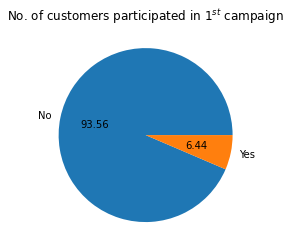

In [69]:
df.acceptedcmp1.value_counts().plot(kind='pie', autopct='%.2f', labels=['No', 'Yes'])
plt.ylabel('')
plt.title("No. of customers participated in $1^{st}$ campaign");

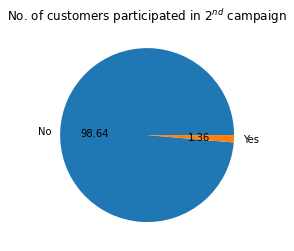

In [65]:
df.acceptedcmp2.value_counts().plot(kind='pie', autopct='%.2f', labels=['No', 'Yes'])
plt.ylabel('')
plt.title("No. of customers participated in $2^{nd}$ campaign");

In [9]:
df.acceptedcmp3.value_counts()

0    2042
1     163
Name: acceptedcmp3, dtype: int64

In [10]:
df.acceptedcmp4.value_counts()

0    2041
1     164
Name: acceptedcmp4, dtype: int64

In [11]:
df.acceptedcmp5.value_counts()

0    2044
1     161
Name: acceptedcmp5, dtype: int64

In [12]:
df.acceptedcmpoverall.value_counts()

0    1747
1     322
2      81
3      44
4      11
Name: acceptedcmpoverall, dtype: int64

### Customer Details

In [13]:
df.complain.value_counts()

0    2185
1      20
Name: complain, dtype: int64

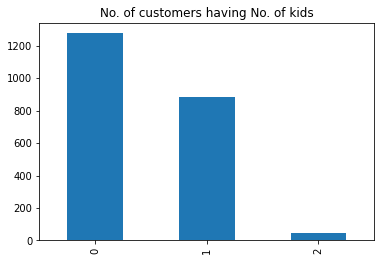

In [71]:
df.kidhome.value_counts().plot(kind='bar')
plt.title("No. of customers having No. of kids");

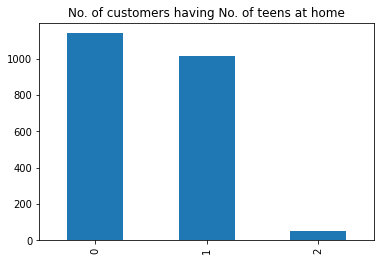

In [72]:
df.teenhome.value_counts().plot(kind='bar')
plt.title("No. of customers having No. of teens at home");

### Find customers age group

In [16]:
def age(row):
    """function to assign age group based on age"""
    
    if 20 < row < 30:
        return "adult"
    elif 30 < row < 50:
        return "middle aged"
    elif row > 50: 
        return "old aged"



df['age_category'] = df.age.apply(age)

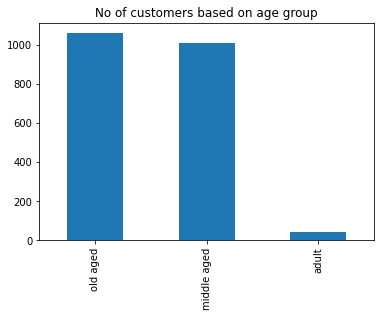

In [73]:
df.age_category.value_counts().plot(kind='bar')
plt.title("No of customers based on age group");

### Marital status of customers

In [18]:
# update all the marital status related fields with proper description

df["marital_divorced"] = df["marital_divorced"].apply(lambda x: "divorced" if x==1 else "" )
df["marital_married"] = df["marital_married"].apply(lambda x: "married" if x==1 else '')
df["marital_single"] = df["marital_single"].apply(lambda x: "single" if x == 1 else "")
df["marital_widow"] = df["marital_widow"].apply(lambda x: "widow" if x == 1 else "")
df["marital_together"] = df["marital_together"].apply(lambda x: "together" if x==1 else "")

In [19]:
# combine all the marriage related fields to one marital status column
df["marital_status"] = df.marital_divorced + df.marital_married + df.marital_single + df.marital_widow + df.marital_together

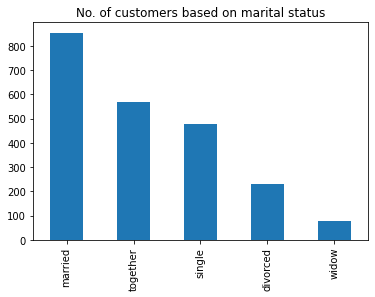

In [75]:
df.marital_status.value_counts().plot(kind='bar')
plt.title("No. of customers based on marital status");

In [21]:
# drop all unnecessary marriage related columns
df = df.drop(columns=['marital_divorced', 'marital_married', 'marital_single', 'marital_widow', 'marital_together'])

#### Education

In [22]:
df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,customer_days,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall,age_category,marital_status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,1529,1441,0,old aged,single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,21,15,0,old aged,single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,1,0,0,734,692,0,old aged,together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,1,0,0,48,43,0,middle aged,together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,0,0,0,1,407,392,0,middle aged,married


In [25]:
# Assign proper description to each education related fields
df["education_2n_cycle"] = df["education_2n_cycle"].apply(lambda x: "2N cycle" if x == 1 else '')
df["education_basic"] = df['education_basic'].apply(lambda x: "Basic" if x ==1 else "")
df["education_graduation"] = df['education_graduation'].apply(lambda x: "Graduation" if x == 1 else "")
df["education_master"] = df["education_master"].apply(lambda x: "Masters" if x == 1 else "")
df['education_phd'] = df["education_phd"].apply(lambda x: "PhD" if x ==1 else "")

In [26]:
# Sum of all the education related fields to one column
df["education_status"] = df.education_2n_cycle + df.education_basic + df.education_graduation + df.education_master + df.education_phd

In [27]:
df.education_status.value_counts()

Graduation    1113
PhD            476
Masters        364
2N cycle       198
Basic           54
Name: education_status, dtype: int64

In [31]:
# drop unnecessary education related columns
df = df.drop(columns=['education_2n_cycle', "education_basic", 'education_graduation', 'education_master', 'education_phd'])

### Income


In [28]:
df.income.max() # maximum income in dataset

113734.0

In [29]:
df.income.min() # minimum income in dataset

1730.0

In [38]:
df.income.mean() # average income in dataset

51622.0947845805

In [33]:
df.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,customer_days,mnttotal,mntregularprods,acceptedcmpoverall,age_category,marital_status,education_status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,1529,1441,0,old aged,single,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,21,15,0,old aged,single,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,734,692,0,old aged,together,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,48,43,0,middle aged,together,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,407,392,0,middle aged,married,PhD


##### 1. Average income

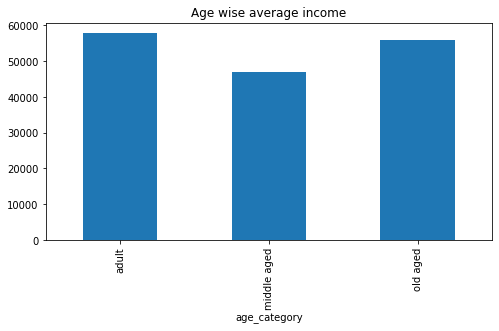

In [54]:
fig = plt.subplots(figsize=(8,4))
fig = df.groupby(['age_category']).income.mean().plot(kind='bar')
plt.title("Age wise average income")
plt.show()

In [52]:
# education wise average income
df.groupby(['education_status']).income.mean()

education_status
2N cycle      47625.333333
Basic         20306.259259
Graduation    51984.008086
Masters       52629.579670
PhD           55220.581933
Name: income, dtype: float64

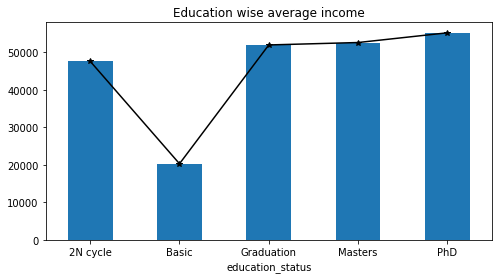

In [92]:
fig = plt.subplots(figsize=(8,4))
fig = df.groupby(['education_status']).income.mean().plot(kind='bar')
fig = df.groupby(['education_status']).income.mean().plot(kind='line', color='black', marker = '*')
plt.title("Education wise average income")
plt.show()

##### 2. Maximum income

In [56]:
df.groupby(['education_status'])['income'].max()

education_status
2N cycle       96547.0
Basic          34445.0
Graduation    105471.0
Masters        98777.0
PhD           113734.0
Name: income, dtype: float64

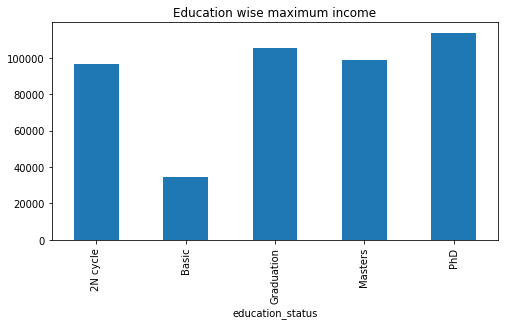

In [57]:
fig = plt.subplots(figsize=(8,4))
fig = df.groupby(['education_status']).income.max().plot(kind='bar')
plt.title("Education wise maximum income")
plt.show()

In [59]:
df.groupby(['age_category']).income.max()

age_category
adult           95529.0
middle aged    102692.0
old aged       113734.0
Name: income, dtype: float64

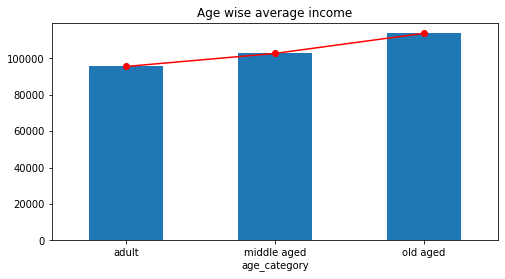

In [91]:
fig = plt.subplots(figsize=(8,4))
fig = df.groupby(['age_category']).income.max().plot(kind='bar')
fig = df.groupby(['age_category']).income.max().plot(kind='line', color="red", marker='o')
plt.title("Age wise average income")
plt.show()

##### 3. Minimum income

In [61]:
df.groupby('age_category').income.min()

age_category
adult          7500.0
middle aged    1730.0
old aged       4023.0
Name: income, dtype: float64

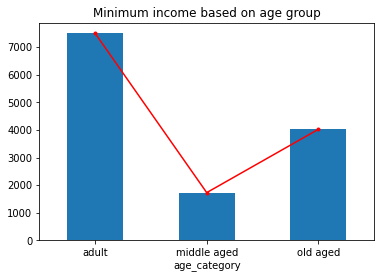

In [90]:
df.groupby('age_category').income.min().plot(kind='bar')
df.groupby('age_category').income.min().plot(kind='line', color='red', marker='.')
plt.title("Minimum income based on age group");

In [62]:
df.groupby("education_status").income.min()

education_status
2N cycle      7500.0
Basic         7500.0
Graduation    1730.0
Masters       6560.0
PhD           4023.0
Name: income, dtype: float64

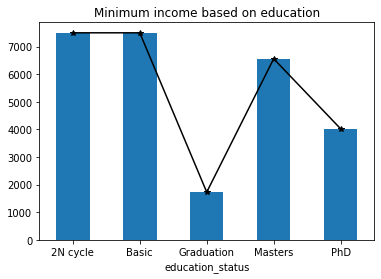

In [89]:
df.groupby("education_status").income.min().plot(kind='bar')
df.groupby("education_status").income.min().plot(kind='line', marker='*', color='black')
plt.title("Minimum income based on education");